In [49]:
!nvidia-smi

Thu May 19 01:51:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                  Off |
| N/A   37C    P0    63W / 300W |  31896MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  On   | 00000000:00:06.0 Off |                  Off |
| N/A   

----

## Pytorch study(0519) 순서
#### 1. 텐서
#### 2. Dataset & DataLoader
#### 3. 변형(Transform)
#### 4. 신경망 모델 구성하기

---

In [5]:
!pip install torch

     |████████████████████████████████| 129.9 MB 28.8 MB/s eta 0:00:01    |███████████                     | 45.0 MB 15.2 MB/s eta 0:00:06


In [6]:
import torch

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
torch.__version__

'1.11.0'

In [ ]:
#torch.manual_seed(777)  
#if device == 'cuda':
#    torch.cuda.manual_seed_all(777) #멀티 gpu 연산 무작위 고정

## 1. 텐서
- 텐서란?
 - numpy의 ndarray와 유사
 - GPU 사용한 연산 가속도 가능

In [2]:
import torch
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

torch.__version__

'1.11.0+cu102'

In [3]:
tensor = torch.rand(3,4)
print(tensor)
print("shape: ", tensor.shape)
print("datatype:", tensor.dtype)
print("stored on :", tensor.device)

tensor([[0.4289, 0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059]])
shape:  torch.Size([3, 4])
datatype: torch.float32
stored on : cpu


In [4]:
#gpu가 존재하면 텐서를 이동
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on {tensor.device}")

Device tensor is stored on cuda:0


---
### 텐서 합치기

In [5]:
#concatenate
print(tensor)
print("---------------------")
t1 = torch.cat([tensor,tensor,tensor], dim=1)
print(t1)
print(t1.shape)
print("---------------------")
t2 = torch.cat([tensor,tensor,tensor], dim=0)
print(t2)
print(t2.shape)

tensor([[0.4289, 0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059]], device='cuda:0')
---------------------
tensor([[0.4289, 0.9021, 0.8978, 0.2792, 0.4289, 0.9021, 0.8978, 0.2792, 0.4289,
         0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016, 0.5716, 0.7095, 0.3840, 0.5016, 0.5716,
         0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059, 0.5224, 0.2964, 0.7692, 0.8059, 0.5224,
         0.2964, 0.7692, 0.8059]], device='cuda:0')
torch.Size([3, 12])
---------------------
tensor([[0.4289, 0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059],
        [0.4289, 0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059],
        [0.4289, 0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059]], device='cuda:0')
torch.Size([9, 4])


--- 
### 텐서 곱하기
- element-wise product
- matrix multiplication

In [6]:
#요소별 곱
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print("[tensor]\n",tensor)
print(z1)
print(z2)
print(z3)

[tensor]
 tensor([[0.4289, 0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059]], device='cuda:0')
tensor([[0.1839, 0.8138, 0.8060, 0.0780],
        [0.3267, 0.5034, 0.1474, 0.2516],
        [0.2729, 0.0879, 0.5917, 0.6495]], device='cuda:0')
tensor([[0.1839, 0.8138, 0.8060, 0.0780],
        [0.3267, 0.5034, 0.1474, 0.2516],
        [0.2729, 0.0879, 0.5917, 0.6495]], device='cuda:0')
tensor([[0.1839, 0.8138, 0.8060, 0.0780],
        [0.3267, 0.5034, 0.1474, 0.2516],
        [0.2729, 0.0879, 0.5917, 0.6495]], device='cuda:0')


In [7]:
#행렬곱 
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(tensor)  #rand_like - 주어진 텐서의 속성을 유지함
torch.matmul(tensor, tensor.T, out=y3)
print(y1)
print(y2)
print(y3)

tensor([[1.8817, 1.3699, 1.4070],
        [1.3699, 1.2291, 1.2085],
        [1.4070, 1.2085, 1.6019]], device='cuda:0')
tensor([[1.8817, 1.3699, 1.4070],
        [1.3699, 1.2291, 1.2085],
        [1.4070, 1.2085, 1.6019]], device='cuda:0')
tensor([[1.8817, 1.3699, 1.4070],
        [1.3699, 1.2291, 1.2085],
        [1.4070, 1.2085, 1.6019]], device='cuda:0')


#### y1, y2, y3 모두 같은 값을 가짐

In [8]:
#무작위/상수 값 사용 
shape = (2,3,)
print(torch.rand(shape))
print(torch.rand(shape).shape)
print(torch.ones(shape))
print(torch.zeros(shape))

tensor([[0.3693, 0.2206, 0.6721],
        [0.8577, 0.7951, 0.0511]])
torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


----
### in-place (바꿔치기 연산)
-  접미사 _ 를 갖는 연산들은 바꿔치기(in-place)연산임  
  x.copy_() 나 x.t_() 는 x를 변경함 

* 메모리를 일부 절약하긴 하지만, 기록(history)이 즉시 삭제되어 도함수(derivative) 계산에 문제가 발생할 수 있으므로 권장하지 않음 !

In [9]:
print(f"{tensor} \n")
tensor.add_(5)
print(f"*tensor.add_한 후 \n {tensor} ")

tensor([[0.4289, 0.9021, 0.8978, 0.2792],
        [0.5716, 0.7095, 0.3840, 0.5016],
        [0.5224, 0.2964, 0.7692, 0.8059]], device='cuda:0') 

*tensor.add_한 후 
 tensor([[5.4289, 5.9021, 5.8978, 5.2792],
        [5.5716, 5.7095, 5.3840, 5.5016],
        [5.5224, 5.2964, 5.7692, 5.8059]], device='cuda:0') 


-----
### numpy변환
- cpu상의 텐서와 numpy배열은 메모리 공간을 공유하기 때문에,  
  하나를 변경하면 다른 하나도 변경됨!

In [10]:
t = torch.ones(2,5)
print(t, "\n")
print(f"numpy: \n {t.numpy()} ")

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]) 

numpy: 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 


In [11]:
t.add_(1)
print(f"t: \n{t}\n")
print(f"n: \n{t.numpy()}")

t: 
tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])

n: 
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


#### numpy배열을 텐서로 변환하기

In [12]:
n = np.ones(5)
t = torch.from_numpy(n)
print(n)
print(t)

np.add(n,1, out=n)
print(f"\nt:  {t}")
print(f"n:  {n}")

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

t:  tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n:  [2. 2. 2. 2. 2.]


-----

## 2. Dataset 과 Dataloader
### - Dataset
  - 샘플과 정답(label)을 저장  

### - Dataloader
  - 데이터셋을 샘플에 쉽게 접근할 수 있도록 배치 학습, 데이터 셔플 등을 제공
  
  
### Dataset과 Dataloader를 사용하는 이유는?
  - 커스터마이징 하기 위해  
  - 한번에 모든 데이터 가져오면 gpu 터짐 
  - 그래서 모든 데이터를 한번에 불러놓고 쓰는 기존의 dataset말고 custom dataset을 만들어야함   
   -> batch를 나눠서 어떤 데이터를 가져오고, 어떤 형태, 얼마나 가져올지 커스터마이징 하기 위함

#### Torchvision의 Fashion-MNIST 데이터셋 사용

In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor, Lambda, Compose, ToPILImage
import matplotlib.pyplot as plt

In [32]:
#이미지 불러와주는 library
#from fastai.data.all import *
#from fastai.vision.all import *

In [14]:
#공개 데이터셋에서 training/test data 받음

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),  #numpy배열에서 torch image tensor로 변환
    #torchvision.transforms.ToTensor()
)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [15]:
ls data

FashionMNIST/


In [16]:
display(training_data)
display(test_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [71]:
sample_idx = torch.randint(len(training_data), size=(1,1)).item() #item():텐서에 저장된 값만 가져옴
training_data[sample_idx]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

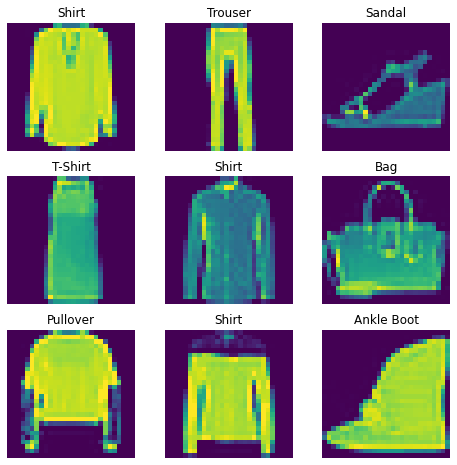

In [63]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze())
plt.show()

---
###  사용자정의 데이터셋 만들기
 - 반드시 3개의 함수를 구현해야함
 ```
 __init__
 __len__
 __getitem__
 ```

#### `__init__`
- 클래스를 생성할 때 실행되는 생성자로, 객체를 초기화시킴
- dataset 객체가 생성될 때 한번만 실행됨  
- 이미지와 주석파일 두가지 포함된 디렉토리와 transform을 초기화시킴


#### `__len__`
- 데이터셋의 sample수 반환시킴

#### `__getitem__`
- 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환시킴
- 인덱스 접근할 때 자동으로 호출되는 메소드


In [19]:
#examples

class Customexample:
    def __init__(self):
        print("예제로 만든 생성자")
        self._numbers = [i for i in range(1,11)]
    
    def __getitem__(self, idx):
        print("getitem 메소드 호출")
        return self._numbers[idx]

a = Customexample()
display(a[3])
display(a[4])
display(a[2:7])

예제로 만든 생성자
getitem 메소드 호출


4

getitem 메소드 호출


5

getitem 메소드 호출


[3, 4, 5, 6, 7]

In [20]:
def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
  # __init__함수는 dataset객체가 생성될 때 한번만 실행됨.
  # 이미지와 anotation file이 포함된 디렉토리와 두가지 변형(transform)을 초기화함

    self.img_labels = pd.read_csv(annotation_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

- 이미지들 - img_dir 디렉토리에 저장   
- 정답 - annotations_file csv파일에 저장  

In [21]:
def __len__(self):
    return len(self.img_labels)  # 데이터셋의 샘플 개수를 반환

In [22]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])  #인덱스를 기반으로 디스크에서 이미지의 위치를 식별
    
    image = read_image(img_path)           #read_image를 사용하여 이미지를 텐서로 변환
    label = self.img_labels.iloc[idx, 1]   #csv데이터로부터 해당하는 정답(label)을 가져옴
    if self.transform:                     #해당하는 경우, 변형(transform)함수들을 호출한뒤,
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
        sample = {'image':image, 'label':label} # 텐서 이미지와 라벨을 python dict형으로 반환함
    return sample

- 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러오고 반환함

In [23]:
training_data.__getitem__(0)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [24]:
import os
import pandas as pd
from torchvision.io import read_image 

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform


    def __len__(self):
        return len(self.img_labels)


    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


### DataLoader로 학습용 데이터 준비하기
- dataset은 데이터셋의 특징과 하나의 샘플에 정답(label)을 지정하는 일을 동시에 함
- 모델을 학습할 때 데이터를 batch로 묶고,매 epoch마다 데이터를 shuffle해서 overfitting 방지


In [25]:
from torch.utils.data import DataLoader 

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
#각각 dataloader에 feature / label이 들어있음

- 하나의 배치 안에 64개 데이터 존재
- dataloader에서 iteration 시키면서 데이터를 사용하게 됨

---
데이터로더 사용해서 배치 하나만 뽑아서 데이터 샘플 보기
- next(): 배치 1개 가져올수있도록 
- 위에서 batch_size = 64 정의했으므로, 1개 배치 안에 64개 이미지,레이블 포함

In [82]:
images, labels = next(iter(train_dataloader)) 
display(images)
display(labels)

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

tensor([5, 5, 4, 5, 0, 1, 5, 4, 6, 1, 3, 2, 2, 5, 2, 4, 3, 2, 7, 3, 3, 8, 0, 0,
        1, 1, 0, 3, 3, 9, 3, 6, 1, 7, 9, 8, 4, 1, 4, 5, 5, 9, 3, 4, 7, 7, 0, 1,
        6, 0, 6, 4, 8, 3, 9, 9, 8, 3, 1, 5, 0, 0, 7, 8])

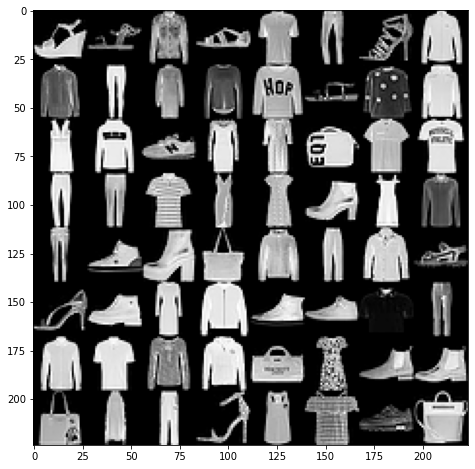

In [84]:
from torchvision import datasets, transforms, utils
from torch.utils import data

#utils.make_grid : 여러 이미지 하나로 묶어서 보기
img = utils.make_grid(images, padding=0 )
npimg = img.numpy()
plt.figure(figsize=(12,8))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [85]:
for label in labels:
    index = label.item()
    print(labels_map[index])

Sandal
Sandal
Coat
Sandal
T-Shirt
Trouser
Sandal
Coat
Shirt
Trouser
Dress
Pullover
Pullover
Sandal
Pullover
Coat
Dress
Pullover
Sneaker
Dress
Dress
Bag
T-Shirt
T-Shirt
Trouser
Trouser
T-Shirt
Dress
Dress
Ankle Boot
Dress
Shirt
Trouser
Sneaker
Ankle Boot
Bag
Coat
Trouser
Coat
Sandal
Sandal
Ankle Boot
Dress
Coat
Sneaker
Sneaker
T-Shirt
Trouser
Shirt
T-Shirt
Shirt
Coat
Bag
Dress
Ankle Boot
Ankle Boot
Bag
Dress
Trouser
Sandal
T-Shirt
T-Shirt
Sneaker
Bag


### DataLoader를 통해 batch묶고 iteration하기

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


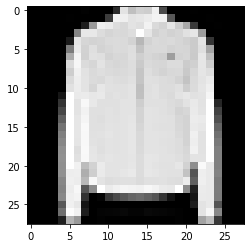

Label: 4


In [26]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[63].squeeze()  #차원이 1인 부분을 제거
label = train_labels[63]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

가로(28) * 세로(28) * 흑백(1) 사이즈의 특징 벡터 

In [70]:
#collate_fn=lambda x: list(map(lambda x: x.to(device), default_collate(x)))

---
## 3. 변형(Transform)

#### - 데이터가 항상 모델에 학습시킬 수 있도록 딱 들어맞게 주어지는 경우는 없음 
  - 즉, transform을 통해 데이터 조작하고 학습에 적합하게 만드는 과정 필수    

#### - torchvision에서 매개변수 2개를 받음
  - 특징(feature)를 변경해주는 transform 함수  
  - 정답(label)를 변경해주는 target_transform 함수 제공

```
예제 fashionmnist 데이터셋에서  
- feature : PIL Image 형식  
- label : 정수
```


#### 특징을 정규화된 텐서 형태로 변환 -> torchvision.transforms.ToTensor
- ToTensor()  
  - PIL Image나 Numpy배열을 FloatTensor로 변환하고, 이미지의 픽셀 크기 값을 0~1 범위로 조정함
  
#### 정답을 one-hot encoding 으로 변환 -> torchvision.transform.Lambda
- Lambda()
 - lambda는 정수를 one-hot encoding해줌
 - 먼저 데이터셋 정답(label) 크기의 zero tensor를 만들어줌
 - scatter_를 호출하여 주어진 정답 y에 해당하는 index에 value=1를 할당

In [27]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

In [28]:
target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float)
                          .scatter_(dim=0, index=torch.tensor(y), value=1))

- 정수를 one-hot으로 부호화된 텐서로 바꾸는 함수를 정의
- 크기가 10(=데이터셋 정답 개수)짜리 zero tensor를 만들고, 
- scatter_를 호출하여 주어진 정답 y에 해당하는 인덱스에 value=1를 할당  
scatter_(dim, index, src)

In [29]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

---
## 4. 신경망 모델 구성하기

#### - 신경망: layer와 module로 구성
  - 모듈이란, 한개 이상의 레이어가 모여서 구성된 것을 말함.

#### - Pytorch의 모든 모듈은 nn.Module의 하위클래스로, nn.Module을 상속받음

- pytorch의 layer를 사용하여 모델 build 를 간편하게 하기 위해서는 위에 같이
  nn.Module를 상속받고 이를 초기화함으로써, nn.Module에서 상속받는 특성들을 
  초기화해주는 것이 필요하다.


In [99]:
import os
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

---

```
Network 
- input layer : 28*28 = 784
- hidden layer : 2개, 각각 256, 128개의 뉴런 갖고 있음
- output layer : 10개
```

In [104]:
class NeuralNetwork(nn.Module):
    # 레이어 정의
    def __init__(self):
    #신경망 계층들 초기화
        super(NeuralNetwork,self).__init__()
        #super() : nn.Module 클래스의 속성들을 가지고 초기화 됨
        
        #__init__에는 모델에 사용될 module(nn.Linear, nn.Conv2d), activation function
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),      
            nn.Linear(64,10),
        )
        
    def forward(self,x):
        # nn.Module를 상속받는 클래스 -> forward메소드에 input data에 대한 연산 구현
    
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [89]:
model = NeuralNetwork().to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)

```
- forward(): 모델에서 실행되어야 하는 계산을 정의
- backward 계산은 backward()를 이용하면 pytorch가 자동으로 해주므로 forward()만 정의하면 됨.

- input을 넣어서 어떤 계산을 진행하여 output이 나올지 정의해줌.
```

```
forward 연산부분  
batch_size=64
- input data = x
- x.shape = torch.Size([64, 1, 28, 28])
- x.shape = torch.Size([64, 784])
- x.shape = torch.Size([64, 256])
- x.shape = torch.Size([64, 128])
- x.shape = torch.Size([64, 10]) # 각 배치마다 10개씩 클래스 예측값 추출
```


In [90]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([9], device='cuda:0')


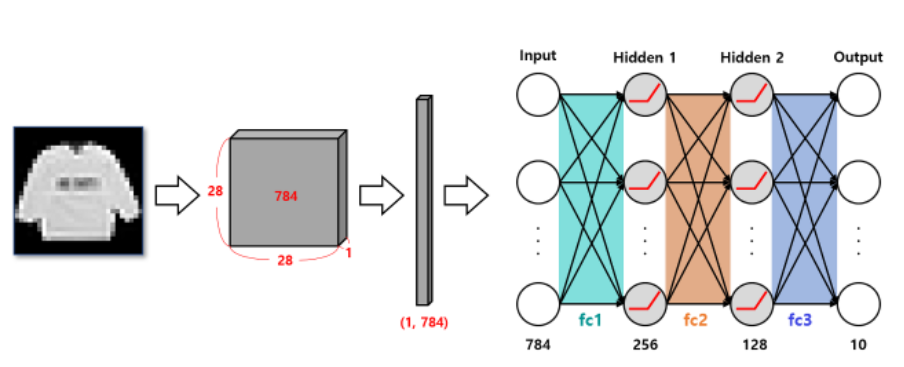

---
### nn.Flatten
- nn.Flatten계층을 초기화하여 각 28*28의 2D이미지를 784 픽셀 값을 갖는 연속된 배열로 변환함

- (N, C, H, W)형식의 텐서를(N, C * H * W)로 

In [35]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
flat_image.size()

torch.Size([3, 784])

In [36]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        batch_size = x.shape[0]
        return x.view(batch_size, -1)

f = Flatten()

### nn.ReLU
 - 
activation : model input과 output사이의 복잡한 관계(mapping)를 만듦.

In [38]:
print(f"Before ReLU : {hidden1}\n")
hidden2 = nn.ReLU()(hidden1)
print(f"After ReLU : {hidden2}")

Before ReLU : tensor([[ 0.5095,  0.0245,  0.1178,  0.1173, -0.5200, -0.0515, -0.3921, -0.5172,
         -0.5008,  0.5647, -0.4505,  0.1939,  0.6012, -0.5694,  0.2148,  0.0098,
          0.1850,  0.0707,  0.1075,  0.0748],
        [ 0.5240, -0.2025, -0.0351,  0.1916, -0.8575,  0.0125, -0.2233, -0.7463,
         -0.1204,  0.5137, -0.4347,  0.4398,  0.4453, -0.2530, -0.1620, -0.1967,
          0.0097,  0.2023,  0.3168, -0.1137],
        [ 0.4898, -0.1083,  0.1412,  0.1098, -1.0193,  0.0553, -0.5688, -0.4576,
         -0.3846,  0.4799, -0.5324,  0.2920,  0.3190, -0.3458, -0.3696, -0.0707,
          0.0119, -0.1360, -0.0973, -0.0490]], grad_fn=<AddmmBackward0>)

After ReLU : tensor([[0.5095, 0.0245, 0.1178, 0.1173, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.5647, 0.0000, 0.1939, 0.6012, 0.0000, 0.2148, 0.0098, 0.1850, 0.0707,
         0.1075, 0.0748],
        [0.5240, 0.0000, 0.0000, 0.1916, 0.0000, 0.0125, 0.0000, 0.0000, 0.0000,
         0.5137, 0.0000, 0.4398, 0.4453, 0.0000, 0.0

```
* activation함수 사용하는 이유?
 - 비선형성을 부여하기 위해 (Linear변환을 하면 hidden layer가 하나밖에 안나옴)
```

---
### nn.Sequential
- 순서를 갖는 모듈 컨테이너

In [39]:
model1 = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(in_features=20, out_features=10)
)
input_image = torch.rand(3,28,28)
logits = model1(input_image)
print(logits)

tensor([[-3.3438e-01,  3.0436e-04,  1.2502e-01, -3.9071e-02,  1.5456e-01,
         -2.4717e-01, -5.3973e-02,  1.2384e-01, -1.4242e-01,  1.0458e-01],
        [-2.2577e-01,  8.8891e-02,  1.2689e-01, -1.1233e-01,  1.3515e-01,
         -1.1112e-01,  4.1184e-02,  2.9177e-02, -8.6208e-02,  2.3571e-01],
        [-2.5461e-01, -2.5778e-02,  6.8959e-02, -7.4992e-02,  1.9779e-01,
         -2.1561e-01, -1.2633e-02,  1.1714e-01, -8.8031e-02,  1.2550e-01]],
       grad_fn=<AddmmBackward0>)


#### nn.Sequential를 사용안한 신경망 구현

In [40]:
class NeuralNetwork1(nn.Module):
    def __init__(self):
        super(NeuralNetwork1, self).__init__()
        
        #__init__에서 사용할 network model 정의
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5) 
        self.fc1 = nn.Linear(in_features=30*5*5, out_features=128, bias=True) 
        self.fc2 = nn.Linear(in_features=128, out_features=10, bias=True)

    
    def forward(self, x):
        #forward 로직 구현
        x = F.relu(self.conv1(x), inplace=True)
        x = F.max_pool2d(x, (2, 2))
        
        x = F.relu(self.conv2(x), inplace=True)
        x = F.max_pool2d(x, (2, 2))
        
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x), inplace=True)
        x = F.relu(self.fc2(x), inplace=True)
        
        return x    

In [41]:
NeuralNetwork1()

NeuralNetwork1(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=750, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

#### nn.Sequential를 사용한 신경망 구현

In [42]:
class NeuralNetwork2(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork2, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=128, bias=True),
            nn.ReLU(inplace=True)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(in_features=128, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
        

    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        x = self.layer4(x)
        
        return x

In [44]:
model2 = NeuralNetwork2()
if torch.cuda.is_available():
    model2.cuda()
    
model2

NeuralNetwork2(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=128, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer4): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [106]:
#from torchviz import make_dot
#import torchsummary

### nn.Softmax
- softmax activation function
  - 신경망 마지막 계층 -> nn.Softmax모듈에 전달될 logits을 반환

In [45]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits) #dim=1 : 값의 합이 1이 되는 차원 
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([1], device='cuda:0')


```
fully-connected layer의 마지막 층의 출력값에 softmax 함수를 취해주면 그 값들은 클래스 확률로 변하게 됨
```

---
### 모델 매개변수
- torch에서 제공하는 parameters() 함수나 named_parameters() 함수를 이용하면 신경망 내부 모든 파라미터에 접근할 수 있음

In [46]:
print("Model structure: ", model, "\n")

for name, param in model.named_parameters(): 
    print(f'name:{name}') 
    print(type(param)) 
    print(f'param.shape:{param.shape}') 
    print(f'param.requries_grad:{param.requires_grad}') #모델 freeze/unfreeze
    print('=====')

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 

name:linear_relu_stack.0.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([512, 784])
param.requries_grad:True
=====
name:linear_relu_stack.0.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([512])
param.requries_grad:True
=====
name:linear_relu_stack.2.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([512, 512])
param.requries_grad:True
=====
name:linear_relu_stack.2.bias
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([512])
param.requries_grad:True
=====
name:linear_relu_stack.4.weight
<class 'torch.nn.parameter.Parameter'>
param.shape:torch.Size([10, 512])
param.requries_grad:Tr

---